(148, 215) (5.765393, 6.5446277) 16.75
(123, 348) (40.29289, 42.344437) 56.25



C:\Users\manon\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\manon\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(236, 312) (6.813148, 7.718219) 19.0
(245, 349) (41.418724, 42.36341) 26.0



C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(252, 342) (6.9993362, 8.07773) 22.5
(298, 374) (41.89953, 42.589622) 19.0



C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(287, 363) (7.4206085, 8.330438) 19.0
(314, 384) (42.047108, 42.680805) 17.5



C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(363, 448) (8.330577, 9.352667) 21.25
(383, 429) (42.67191, 43.088497) 11.5



C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(368, 490) (8.386741, 9.854024) 30.5
(414, 478) (42.947605, 43.524235) 16.0



C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


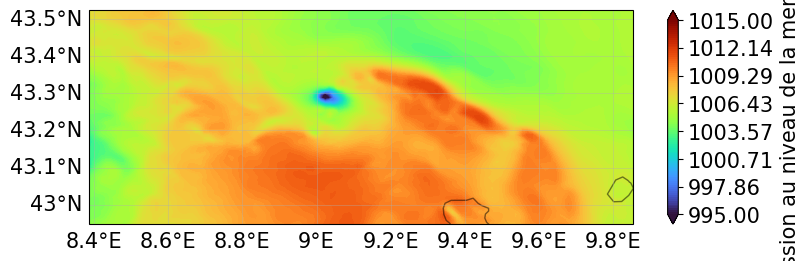

C:\Users\manon\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


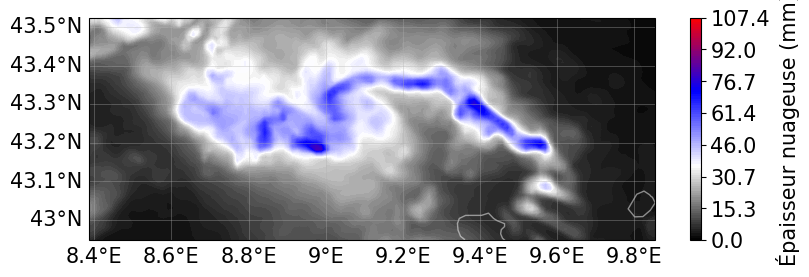

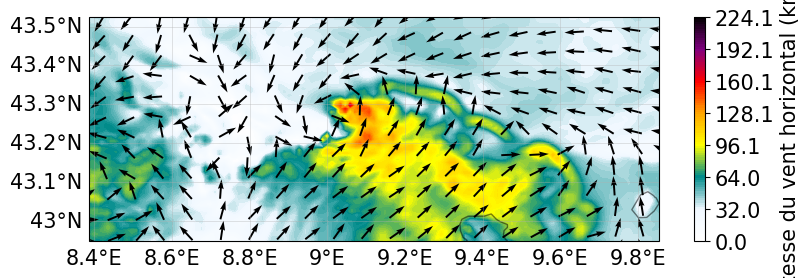

In [2]:
from plots import Map
from readers import MesoNH

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import json

import os

from datetime import datetime, timedelta


plt.rcParams.update({
    "text.usetex": False,
    # "font.family": "serif",
    "font.size": 15
})


def get_index(var_array: np.array, value):
    delta = np.abs(value - var_array)
    index = np.array(np.where(delta == delta.min()))
    return index[:,0]


def sum_clouds(thcw, thrw, thic, thsn, thgr):
    return thcw + thrw + thic + thsn + thgr


def norm_wind(um10, vm10, wind10):
    return um10 / wind10, vm10 / wind10 


def plot_zoom(mesonh, i_lim, j_lim, time, width, dx, clouds_min, clouds_max, wind_min, wind_max):
    plt.close("all")

    # Creating Map instance
    my_map = Map(mesonh.longitude, mesonh.latitude)
    lon = (
        mesonh.longitude[j_lim[0], i_lim[0]],
        mesonh.longitude[j_lim[1], i_lim[1]]
    )
    lat = (
        mesonh.latitude[j_lim[0], i_lim[0]],
        mesonh.latitude[j_lim[1], i_lim[1]]
    )

    print(i_lim, lon, (i_lim[1] - i_lim[0]) * 0.250)
    print(j_lim, lat, (j_lim[1] - j_lim[0]) * 0.250)
    print()
    zoom = f"{round(float(lat[0]), 1)}-{round(float(lat[1]), 1)}N_{round(float(lon[0]), 1)}-{round(float(lon[1]), 1)}E"

    # Pressure
    axes = my_map.init_axes(fig_kw={"figsize": (8, 5), "layout": "compressed"})[1]
    axes.set_extent([lon[0], lon[1], lat[0], lat[1]])
    
    var = mesonh.get_var("MSLP")
    contourf = my_map.plot_contourf(
        var,
        cmap="turbo",
        extend="both",
        levels=np.linspace(995, 1015, 100)
    )
    cb = plt.colorbar(contourf, label="Pression au niveau de la mer (hPa)")
    cb.set_ticks(np.linspace(995, 1015, 8))
    plt.savefig(f"pressure_{time}_{zoom}_{dx}m.png")
    
    # Clouds
    axes = my_map.init_axes(
        fig_kw={"figsize": (8, 5), "layout": "compressed"},
        feature_kw={"linewidth": 1, "alpha": 0.5, "color": "white"}
    )[1]
    axes.set_extent([lon[0], lon[1], lat[0], lat[1]])
    
    var = mesonh.get_var("THCW", "THRW", "THIC", "THSN", "THGR", func = sum_clouds)
    contourf = my_map.plot_contourf(
        var,
        cmap=LinearSegmentedColormap.from_list("cmap2", ["black", "white", "blue", "red"]),
        levels=np.linspace(clouds_min, clouds_max, 100)
    )
    cb = plt.colorbar(contourf, label="Épaisseur nuageuse (mm)")
    cb.set_ticks(np.linspace(clouds_min, clouds_max, 8))
    plt.savefig(f"clouds_{time}_{zoom}_{dx}m.png")
    
    # Wind
    axes = my_map.init_axes(fig_kw={"figsize": (8, 5), "layout": "compressed"})[1]
    axes.set_extent([lon[0], lon[1], lat[0], lat[1]])
    var = mesonh.get_var("WIND10", func = lambda x: x * 3.6)
    contourf = my_map.plot_contourf(
        var,
        cmap=LinearSegmentedColormap.from_list("cmap2", [
            "white", (240/255, 248/255, 255/255),
            "darkcyan",
            "yellow",
            "orange",
            "red",
            "purple",
            "black"
        ]), 
        levels=np.linspace(wind_min, wind_max, 100)
    )
    cb = plt.colorbar(contourf, label="Vitesse du vent horizontal (km/h)")
    cb.set_ticks(np.linspace(wind_min, wind_max, 8))

    mesh = 25
    if dx == 500:
        mesh = 12
    elif dx == 1000:
        mesh = 6

    wind_u, wind_v = mesonh.get_var("UM10", "VM10", "WIND10", func = norm_wind)
    my_map.plot_quiver(
        wind_u,
        wind_v, 
        x_mesh=mesh,
        y_mesh=mesh,
        width=width,
        scale=20,
        scale_units="xy",
        units="xy"
    )
    plt.savefig(f"wind_{time}_{zoom}_{dx}m.png")


def get_time_index(hour, minute):
    return (hour - 4) * 60 + (minute - 1)


def latex_code(i_lim, j_lim, time):
    content =  "\\begin{center} \\begin{tabular}{rl}"
    content += f"\n\t\\textbf{{Heure simulation}}    & {time} TU \\\\"
    content += "\n\t\\textbf{Heure observation}   & \\\\"
    content += f"\n\t\\textbf{{Longitude}}           & {lon[i_lim[0], j_lim[0]]}°E -- {lon[i_lim[1], j_lim[1]]}°E \\\\"
    content += f"\n\t\\textbf{{Index longitude}}     & {i_lim[0]} -- {i_lim[1]} \\\\"
    content += f"\n\t\\textbf{{Distance zonale}}     & {(i_lim[1] - i_lim[0]) * 0.250}~km \\\\"
    content += f"\n\t\\textbf{{Latitude}}            & {lat[i_lim[0], j_lim[0]]}°N -- {lat[i_lim[1], j_lim[1]]}°N \\\\"
    content += f"\n\t\\textbf{{Index latitude}}      & {j_lim[0]} -- {j_lim[1]} \\\\"
    content += f"\n\t\\textbf{{Distance méridienne}} & {(j_lim[1] - j_lim[0]) * 0.250}~km \\\\"
    content += "\n\\end{tabular} \\end{center}"
    print(content)


def index_to_latlon(mesonh, i_lim, j_lim):
    lon_min = mesonh.longitude[i_lim[0], j_lim[0]]
    lat_min = mesonh.latitude[i_lim[0], j_lim[0]]
    lon_max = mesonh.longitude[i_lim[1], j_lim[1]]
    lat_max = mesonh.latitude[i_lim[1], j_lim[1]]
    return ((lon_min, lon_max),(lat_min, lat_max))


def latlon_to_index(mesonh, lon_lim, lat_lim):
    j_min = get_index(mesonh.longitude, lon_lim[0])[1]
    j_max = get_index(mesonh.longitude, lon_lim[1])[1]
    i_min = get_index(mesonh.latitude, lat_lim[0])[0]
    i_max = get_index(mesonh.latitude, lat_lim[1])[0]
    return ((i_min, i_max),(j_min, j_max))


def get_mesonh(dx):
    files = []
    for time_index in range (1, 361, 1):
        files.append(f"../Donnees/DX{dx}/CORSE.1.SEG01.OUT.{str(time_index).zfill(3)}.nc")
    return MesoNH(files)
    

def plot_all(dx, args):
    mesonh = get_mesonh(dx)

    with open(f"lim_{dx}m.json", "r") as file:
        lim = json.loads(file.read())

    clouds_min, clouds_max = lim["clouds"]
    wind_min, wind_max = lim["wind"]

    os.system("rm *.png")
    for i_lim, j_lim, hour, minute, width in args:
        mesonh.get_data(get_time_index(hour, minute))
        time = f"{str(hour).zfill(2)}h{str(minute).zfill(2)}"
        plot_zoom(mesonh, i_lim, j_lim, time, width, dx, clouds_min, clouds_max, wind_min, wind_max)
        
        
dx250_zoom = (
    ((600 , 860 ), (497 , 1397), 5, 0 , 0.004),
    ((950 , 1250), (966 , 1400), 6, 30, 0.004), 
    ((1000, 1370), (1200, 1500), 7, 0 , 0.004),
    ((1150, 1450), (1260, 1530), 7, 15, 0.004),
    ((1440, 1790), (1530, 1730), 8, 15, 0.004),
    ((1470, 1940), (1650, 1930), 8, 45, 0.005)
)

dx1000_zoom =  (
    ((148 , 215 ), (123 , 348 ), 5, 0 , 0.004),
    ((236 , 312 ), (245 , 349 ), 6, 30, 0.004), 
    ((252 , 342 ), (298 , 374 ), 7, 0 , 0.004),
    ((287 , 363 ), (314 , 384 ), 7, 15, 0.004),
    ((363 , 448 ), (383 , 429 ), 8, 15, 0.004),
    ((368 , 490 ), (414 , 478 ), 8, 45, 0.005)
)

plot_all(1000, dx1000_zoom)

# mesonh250 = get_mesonh(250)
# mesonh1000 = get_mesonh(1000)
# lon_lim, lat_lim = index_to_latlon(mesonh250, (1470, 1940), (1650, 1930))
# i_lim, j_lim = latlon_to_index(mesonh1000, lon_lim, lat_lim)
